# Get different sentiment algorithms and compare them

In [2]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from template import quantnote_template # Import your template here


In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client.query_api_client import QuantNoteQueryApi

## Create api client

In [4]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

In [5]:
sent1_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent1 = client.get_data_response(sent1_query)
sent1['time'] = pd.to_datetime(sent1['time'])
sent1.set_index('time')
sent1['sentiment'] = pd.to_numeric(sent1['sentiment'])
sent1['ewm'] = sent1['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent1

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.484920,2023-02-26 21:00:00+00:00,0.484920
1,0.440400,2023-02-26 22:00:00+00:00,0.476825
2,0.115750,2023-02-26 23:00:00+00:00,0.411175
3,0.440400,2023-02-27 01:00:00+00:00,0.416489
4,0.273200,2023-02-27 03:00:00+00:00,0.390436
...,...,...,...
191,0.181400,2023-03-08 15:00:00+00:00,0.099745
192,-0.057250,2023-03-08 16:00:00+00:00,0.071201
193,-0.506275,2023-03-08 17:00:00+00:00,-0.033795
194,-0.273200,2023-03-08 18:00:00+00:00,-0.077323


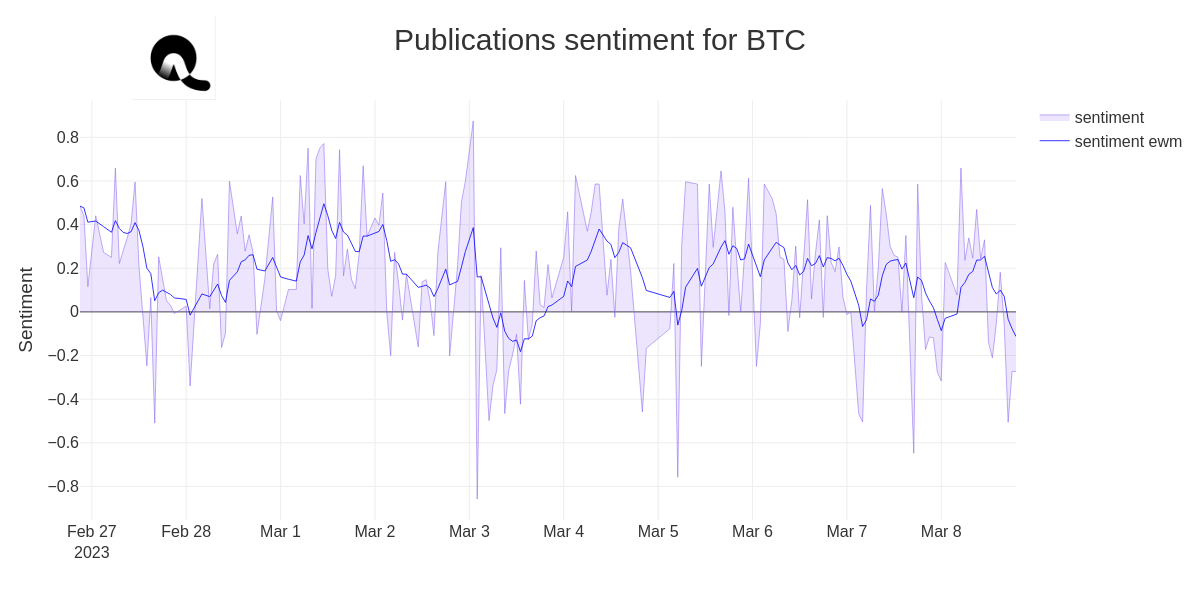

In [10]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent1['time'],
                         y=sent1['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='blue')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False,
    template='quantnote'
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [7]:
sent2_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_2) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent2 = client.get_data_response(sent2_query)
sent2['time'] = pd.to_datetime(sent2['time'])
sent2.set_index('time')
sent2['sentiment'] = pd.to_numeric(sent2['sentiment'])
sent2['ewm'] = sent2['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent2

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.281186,2023-02-26 21:00:00+00:00,0.281186
1,0.000000,2023-02-26 22:00:00+00:00,0.230061
2,0.000000,2023-02-26 23:00:00+00:00,0.188232
3,0.000000,2023-02-27 01:00:00+00:00,0.154008
4,0.000000,2023-02-27 03:00:00+00:00,0.126006
...,...,...,...
191,0.000000,2023-03-08 15:00:00+00:00,-0.036953
192,0.000000,2023-03-08 16:00:00+00:00,-0.030234
193,0.000000,2023-03-08 17:00:00+00:00,-0.024737
194,0.000000,2023-03-08 18:00:00+00:00,-0.020239


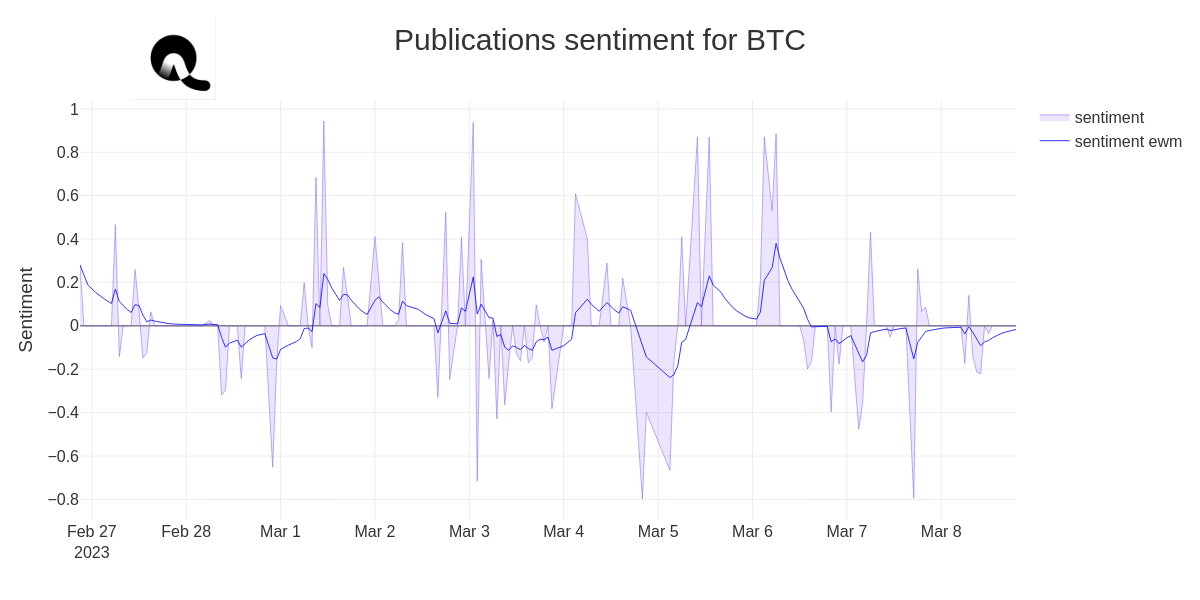

In [11]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent2['time'],
                         y=sent2['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='blue')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False,
    template='quantnote'
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [13]:
sent3_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_3) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent3 = client.get_data_response(sent3_query)
sent3['time'] = pd.to_datetime(sent3['time'])
sent3.set_index('time')
sent3['sentiment'] = pd.to_numeric(sent3['sentiment'])
sent3['ewm'] = sent3['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent3

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.999989,2023-02-26 21:00:00+00:00,0.999989
1,0.000000,2023-02-26 22:00:00+00:00,0.818173
2,0.000000,2023-02-26 23:00:00+00:00,0.669414
3,0.000000,2023-02-27 01:00:00+00:00,0.547702
4,0.000000,2023-02-27 03:00:00+00:00,0.448120
...,...,...,...
191,0.000000,2023-03-08 15:00:00+00:00,0.006098
192,0.000000,2023-03-08 16:00:00+00:00,0.004989
193,-0.838458,2023-03-08 17:00:00+00:00,-0.148365
194,0.000000,2023-03-08 18:00:00+00:00,-0.121389


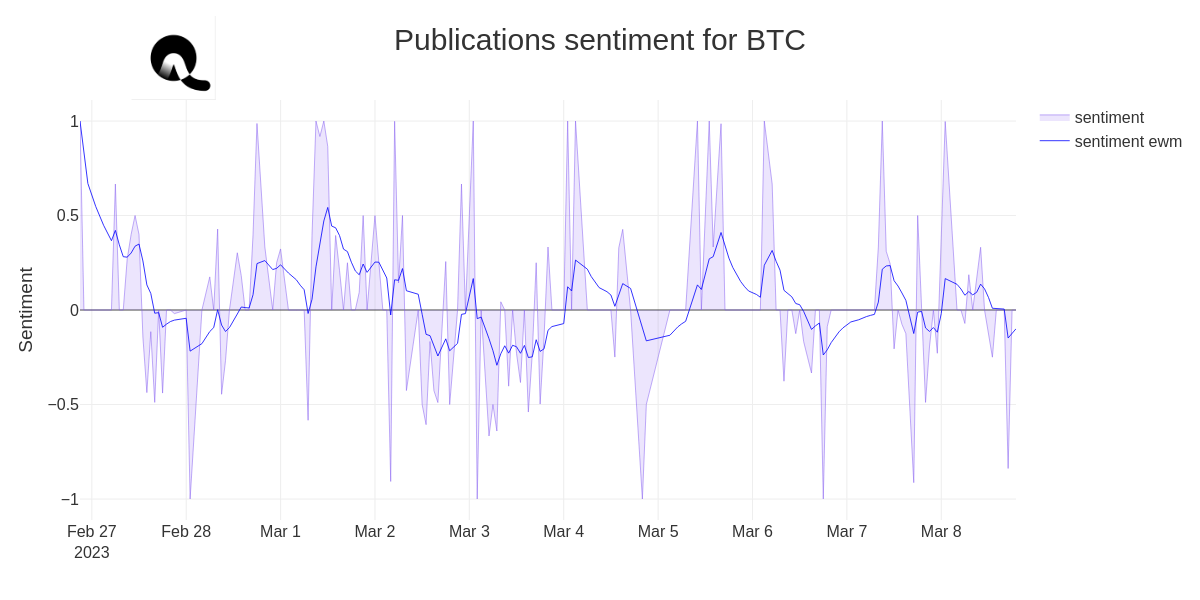

In [14]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent3['time'],
                         y=sent3['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='blue')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False,
    template='quantnote'
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

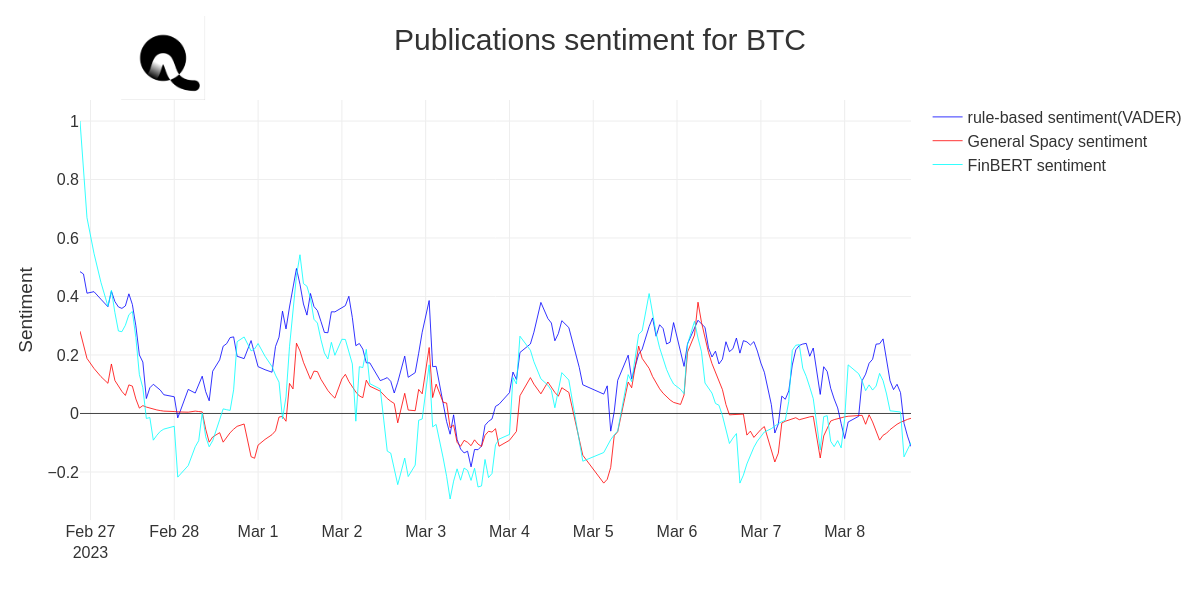

In [15]:
fig = make_subplots()

sentiment1_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="rule-based sentiment(VADER)",
                         mode='lines',
                         line=dict(width=0.8, color='blue')
                         )

sentiment2_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="General Spacy sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='red')
                         )

sentiment3_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="FinBERT sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='cyan')
                         )

fig.add_trace(sentiment1_ewm)
fig.add_trace(sentiment2_ewm)
fig.add_trace(sentiment3_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False,
    template='quantnote'
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [18]:
tohlcv_query = """SELECT p.bucket as time, open_stable, high_stable, low_stable, close_stable, v.volume
FROM series.binance.price_ticks_hourly p
         join series.binance.volume_ticks_hourly v
              on (p.bucket = v.bucket and p.token_id = v.token_id and p.platform_id = v.platform_id)
WHERE p.token_id = 1
  and p.bucket >= now() - interval '10' day
ORDER BY time;"""

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close_stable,high_stable,low_stable,open_stable,time,volume
0,23639.68,23689.99,23461.89,23499.33,2023-02-26 20:00:00+00:00,15255.14388
1,23560.6,23653,23550.75,23639.68,2023-02-26 21:00:00+00:00,8266.59838
2,23476.41,23595.76,23323.42,23560.61,2023-02-26 22:00:00+00:00,12914.25593
3,23554.85,23637.88,23455,23477.14,2023-02-26 23:00:00+00:00,12104.22981
4,23492.64,23567.69,23451.66,23554.85,2023-02-27 00:00:00+00:00,7993.6986
...,...,...,...,...,...,...
234,21974.73,22030.52,21922.22,21989.16,2023-03-08 14:00:00+00:00,19735.20056
235,22140.8,22229.04,21876.66,21974.73,2023-03-08 15:00:00+00:00,34124.5517
236,22140.61,22218.3,22058.3,22139.97,2023-03-08 16:00:00+00:00,15478.76546
237,22034.48,22150,22022.52,22140.61,2023-03-08 17:00:00+00:00,10620.41683


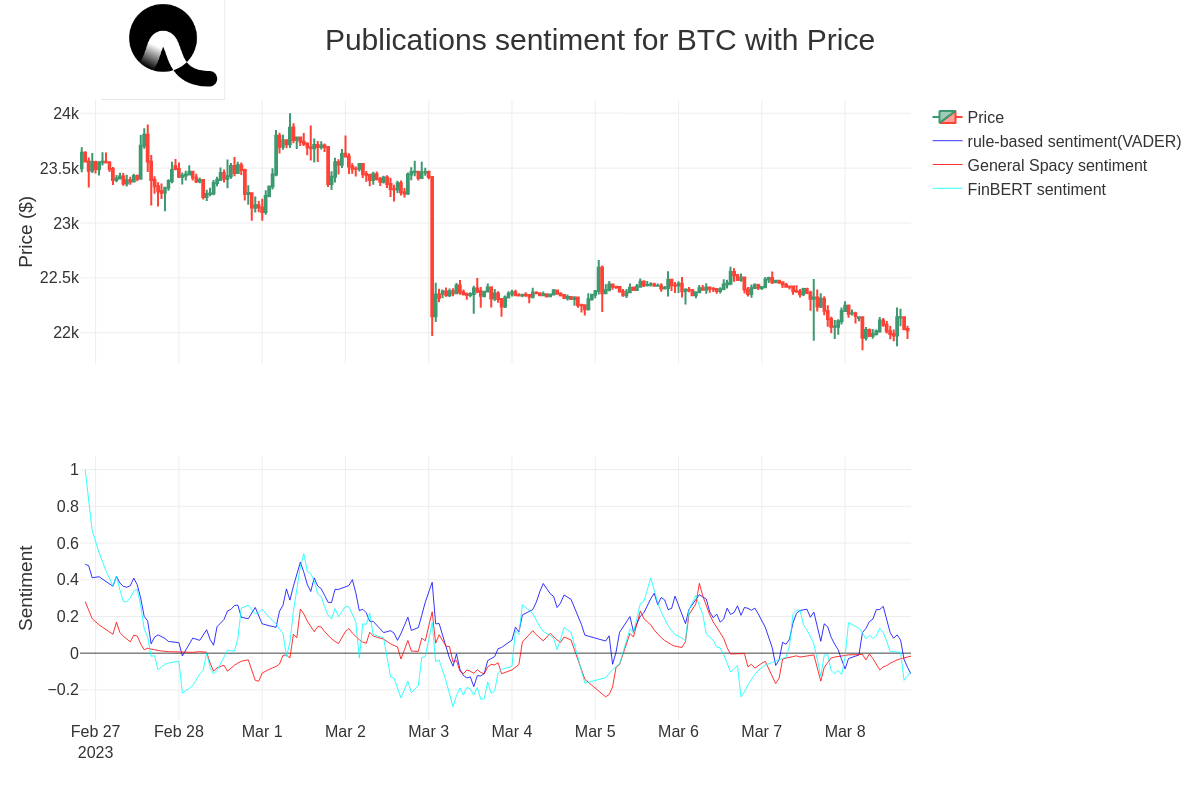

In [19]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open_stable'],
    high=tohlcv_resp['high_stable'],
    low=tohlcv_resp['low_stable'],
    close=tohlcv_resp['close_stable'],
    name="Price"
)

fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(sentiment1_ewm, row=2, col=1)
fig.add_trace(sentiment2_ewm, row=2, col=1)
fig.add_trace(sentiment3_ewm, row=2, col=1)

fig.update_layout(
    width=1200, height=800,
    title="Publications sentiment for BTC with Price",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False,
    template='quantnote'
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.show("png"  )